# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from sklearn.linear_model import LinearRegression
from itertools import combinations

In [2]:
calories = [20, 25, 45, 30, 25, 15, 10, 20, 25,10]
sodium = [0, 40, 80, 60, 30, 115, 0, 0, 20, 10]
potassium = [230, 220, 460, 250, 270, 260, 140, 200, 190, 70]
carbo_hydrate = [4, 6, 8, 7, 5, 4, 2, 5, 5, 2]
dietary_fiber = [2, 2, 3, 2, 2, 2, 1, 3, 2, 1]
sugars = [2, 4, 2, 5, 2, 2, 1, 2, 3, 1]
protien = [2, 1, 4, 1, 2, 0, 1, 1, 1,0]

#example dataset
product_price = [23422, 112, 12122, 2333, 2344, 6785, 974, 999, 4564, 8800]
rating = [5, 3, 5, 3, 4, 3, 4, 3, 3, 2]

In [3]:
calories = np.array(calories)
sodium = np.array(sodium)
potassium = np.array(potassium)
carbo_hydrate = np.array(carbo_hydrate)
dietary_fiber = np.array(dietary_fiber)
sugars = np.array(sugars)
protien = np.array(protien)

#example dataset
product_price = np.array(product_price)
rating = np.array(rating)

# (a)

### Builtin Numpy Methods

In [4]:
potassium.var()

9209.0

In [5]:
potassium.std()

95.96353474106714

### My Methods

In [6]:
def variance(p):
    d = p - p.mean()
    d_s = sum(d**2)
    
    return d_s/len(p)

In [7]:
def standar_deviation(p):
    d = p - p.mean()
    d_s = sum(d**2)
    var = d_s/len(p)
    
    return var**0.5

In [8]:
variance(potassium)

9209.0

In [9]:
standar_deviation(potassium)

95.96353474106714

### Steps Calculations

In [10]:
diff = potassium - potassium.mean()
print(diff)

var = sum(diff**2)/len(potassium)
std = var**(1/2)
print("Variance : ",var)
print("Standard Deviation : ",std)

[   1.   -9.  231.   21.   41.   31.  -89.  -29.  -39. -159.]
Variance :  9209.0
Standard Deviation :  95.96353474106714


# (b)

### My Method

In [13]:
def covariance(*p):
    comb = list(combinations(p, 2))
    d_cov = np.array([[[x for x in t-t.mean()] for t in c] for c in comb])
    #d_cov = np.array([[x for x in t-t.mean()] for t in p])
    c = [np.prod(x, axis=0) for x in d_cov]
    
    s_cov = np.array([sum(x) for x in c])

    return s_cov/len(p[0])
    #d_cov = np.prod(d_cov, axis=0)
    #return sum(d_cov)/len(d_cov)

In [34]:
covariance(sugars, protien, dietary_fiber)

array([-0.02,  0.2 ,  0.4 ])

### Steps Each Attribute Convariance

In [36]:
d_diet = dietary_fiber - dietary_fiber.mean()
d_sugar = sugars - sugars.mean()
d_protien = protien - protien.mean()

d_cov1 =  d_sugar * d_protien
d_cov2 = d_sugar * d_diet
d_cov3 = d_protien * d_diet

print(d_cov1)
print(d_cov2)
print(d_cov3)
s_cov1 = sum(d_cov1)
s_cov2 = sum(d_cov2)
s_cov3 = sum(d_cov3)

print("SUM : ",s_cov1)
print("SUM : ",s_cov2)
print("SUM : ",s_cov3)

cov1 = s_cov1/len(dietary_fiber)
cov2 = s_cov2/len(dietary_fiber)
cov3 = s_cov3/len(dietary_fiber)

print("Covariance 1 : ",cov1)
print("Covariance 2 : ",cov2)
print("Covariance 3 : ",cov3)

[-0.28 -0.48 -1.08 -0.78 -0.28  0.52  0.42  0.12 -0.18  1.82]
[-0.   0.  -0.4  0.  -0.  -0.   1.4 -0.4  0.   1.4]
[ 0.  -0.   2.7 -0.   0.  -0.   0.3 -0.3 -0.   1.3]
SUM :  -0.20000000000000018
SUM :  2.0
SUM :  4.0
Covariance 1 :  -0.020000000000000018
Covariance 2 :  0.2
Covariance 3 :  0.4


# (c) Correlation

### Buitin Numpy Methods

In [17]:
np.corrcoef(product_price, rating)

array([[1.        , 0.54820169],
       [0.54820169, 1.        ]])

In [18]:
sc.pearsonr(rating, product_price)

(0.5482016866472738, 0.10086242345068283)

In [19]:
sc.pearsonr(sodium, potassium)

(0.6156323689191786, 0.05811352428437063)

In [20]:
np.corrcoef(sodium, potassium)

array([[1.        , 0.61563237],
       [0.61563237, 1.        ]])

### My Method

In [21]:
def correlation_dot(p, q):
    _p = (p-p.mean())/p.std()
    _q = (q-q.mean())/q.std()
    return _p.dot(_q)/len(p)

In [22]:
correlation_dot(sodium, potassium)

0.6156323689191787

# (d) Regression

In [24]:
x = potassium.reshape(-1,1)
y = calories

In [25]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_pred = model.predict(x)
print(y_pred)

[22.58985775 21.69128027 43.25713975 24.3870127  26.18416766 25.28559018
 14.50266044 19.89412531 18.99554783  8.21261809]


In [27]:
print("m : ",model.coef_)
print("c : ", model.intercept_)

m :  [0.08985775]
c :  1.9225757411228166


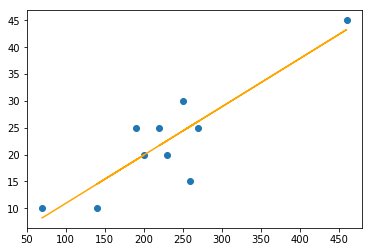

In [28]:
plt.scatter(x, y)
plt.plot(x, y_pred, color = 'orange')
plt.show()

In [29]:
err = abs(y - y_pred)
print("Error : ", err)
print("Mean Absolute Error : ", err.mean())

Error :  [ 2.58985775  3.30871973  1.74286025  5.6129873   1.18416766 10.28559018
  4.50266044  0.10587469  6.00445217  1.78738191]
Mean Absolute Error :  3.7124552068628516


In [30]:
err.mean()

3.7124552068628516